In [165]:
import pandas as pd
import os
import seaborn as sns
import json
from tqdm.notebook import tqdm
import pickle
import joblib
tqdm.pandas()

/opt/miniconda3/envs/hackzh2020/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
csv_files = [os.path.join('/home/aneesh/data/srf_data/SMD', filename) for filename in os.listdir('/home/aneesh/data/srf_data/SMD')]

def extract_text_from_json(json_list):
    try:
        text = []
        for elem in json_list:
            if 'zt' in elem.keys():
                text.append(elem['zt']['text'])
            if 'p' in elem.keys():
                try:
                    text.append(elem['p']['text'])
                except Exception as e:
                    pass
#                     print('List found in paragraph')

                    
        return '\n'.join(text)
    except Exception as e:
        pass
#         print(e)
#         print('dict in list failed')
    try:
        text = []
        for elem in json_list:
            for sect in elem:
                if 'zt' in sect.keys():
                    text.append(sect['zt']['text'])
                if 'p' in sect.keys():
                    text.append(sect['p']['text'])
        return '\n '.join(text)
    except Exception as e:
        pass
#         print(e)
#         print('dict in list of list failed!')

CORONA_WORD_LIST = list(set([elem[0] for elem in pd.read_csv('/home/aneesh/data/srf_data/wordlists/viruswordlist.en.txt').values]
    +[elem[0] for elem in pd.read_csv('/home/aneesh/data/srf_data/wordlists/viruswordlist.de.txt').values]))

def select_corona_article(string):
    paragraphs = string.split('\n')
    corona_paragraphs = []
    for para in paragraphs:
        if is_corona(para, CORONA_WORD_LIST)>0:
            corona_paragraphs.append(para)
    return '\n '.join(corona_paragraphs)

def is_corona(sent, word_list):
    return sum(word in sent.lower() for word in word_list)

def process_data_frame(df):
    df.pubDateTime = pd.to_datetime(df.pubDateTime, utc=True)
    df.tx = df.tx.apply(lambda x : json.loads(x))
    df.tx = df.tx.apply(lambda x : extract_text_from_json(x))
    df['week'] = df.pubDateTime.dt.isocalendar().week
    df['year'] = df.pubDateTime.dt.year
    return df[['so','so_txt','pubDateTime','week','year','la','tx','ru']].dropna(subset=['pubDateTime', 'tx','so'])

In [3]:
def select_corona_article(string):
    paragraphs = string.split('\n')
    corona_paragraphs = []
    for para in paragraphs:
        if is_corona(para, CORONA_WORD_LIST)>0:
            corona_paragraphs.append(para)
    return '\n '.join(corona_paragraphs)
           

# Data cleaning

In [4]:
DF = pd.DataFrame()
for csv_file in tqdm(csv_files): 
    if '.csv' in csv_file:
        df = pd.read_csv(csv_file)
        print(f'Original length {len(df)}')
        df = process_data_frame(df)
        print(f'New length {len(df)}')
        DF = DF.append(df)

Original length 1012
New length 1006
Original length 3047
New length 2873
Original length 11313
New length 9483
Original length 1736
New length 1391
Original length 13955
New length 12220
Original length 13015
New length 11364
Original length 2772
New length 2047
Original length 12175
New length 10798
Original length 2800
New length 2659
Original length 116
New length 114
Original length 16412
New length 16409
Original length 563
New length 534
Original length 1253
New length 1031
Original length 2831
New length 2831
Original length 691
New length 687
Original length 112
New length 112
Original length 20987
New length 20987
Original length 12345
New length 10536
Original length 2315
New length 2314
Original length 123
New length 123
Original length 26241
New length 26241
Original length 16161
New length 16157
Original length 15372
New length 15368
Original length 13326
New length 11682
Original length 5273
New length 5205
Original length 3423
New length 3423
Original length 5007
New le

<AxesSubplot:xlabel='pubDateTime', ylabel='Score'>

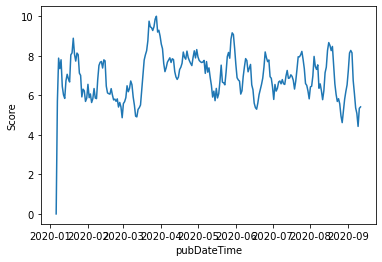

In [228]:
sns.lineplot(x=DF.index, y='Score', data=DF)

# Corona estimaton in the article

In [ ]:
DF['corona_articles'] = DF.tx.progress_apply(lambda x: select_corona_article(x))

# Corona related word counts in corona articles

In [129]:
for word in tqdm(CORONA_WORD_LIST):
    DF[word] = DF.corona_articles.progress_apply(lambda x : is_corona(x, [word])) 
    print(f'calculating occurences for {word}') 
    print(f"Total occurences {sum(DF[word].values)}")
    print(f"Number of articles {sum(DF[word]>0)*100.0/len(DF)}%")


calculating occurences for covid19
Total occurences 311
Number of articles 0.06479504140840668%



calculating occurences for fälle
Total occurences 62346
Number of articles 12.989426532631908%



calculating occurences for robert koch
Total occurences 662
Number of articles 0.13792385020053127%



calculating occurences for covid-19
Total occurences 32013
Number of articles 6.66972238137403%



calculating occurences for lockdown
Total occurences 24551
Number of articles 5.115058075941455%



calculating occurences for corona
Total occurences 151049
Number of articles 31.470180738580133%



calculating occurences for case
Total occurences 1674
Number of articles 0.3487681650085942%



calculating occurences for wet market
Total occurences 26
Number of articles 0.005416948799416637%



calculating occurences for covid
Total occurences 35666
Number of articles 7.430803687692067%



calculating occurences for bat
Total occurences 27772
Number of articles 5.786134694515339%



calculating occurences for fallzahl
Total occurences 7995
Number of articles 1.6657117558206156%



calculating occurences for infection
Total occurences 215
Number of articles 0.044793999687483724%



calculating occurences for infektion
Total occurences 36076
Number of articles 7.5162248033751755%



calculating occurences for bag
Total occurences 16500
Number of articles 3.4376790457836344%



calculating occurences for cases
Total occurences 168
Number of articles 0.03500182301161519%



calculating occurences for hospitalisierung
Total occurences 437
Number of articles 0.09104640866711808%



calculating occurences for daniel koch
Total occurences 3512
Number of articles 0.7317047762904318%



calculating occurences for fall
Total occurences 190875
Number of articles 39.767696234178864%



calculating occurences for hospitalization
Total occurences 2
Number of articles 0.0004166883691858951%



In [ ]:
DF['paragraphs'] = DF.tx.progress_apply(lambda x : len(x.split('\n')))
DF = DF.drop(columns='tx')
DF.to_csv('/home/aneesh/data/srf_data/processed/processed_new.csv')

In [5]:
# DF = pd.read_csv('/home/aneesh/data/srf_data/processed/processed_new.csv')

/opt/miniconda3/envs/hackzh2020/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Including paragraphs with corona only


# Removing rows with no corona information.

In [20]:
DF = DF[DF['corona_articles'].notna()]

# Preparing language processor to select location

In [52]:
with open('/home/aneesh/data/location_data/swiss_country_dict.pkl','rb') as f:
    swiss_country = pickle.load(f)
with open('/home/aneesh/data/location_data/swiss_towns_dict.pkl','rb') as f:
    swiss_town = pickle.load(f)
with open('/home/aneesh/data/location_data/swiss_adminareas_dict.pkl','rb') as f:
    swiss_adminareas = pickle.load(f)

locs = list(locations.keys())
from flashtext import KeywordProcessor
kp_country = KeywordProcessor()
kp_town = KeywordProcessor()
kp_admin = KeywordProcessor()
kp_country.add_keywords_from_list(list(swiss_country.keys()))
kp_town.add_keywords_from_list(list(swiss_town.keys()))
kp_admin.add_keywords_from_list(list(swiss_adminareas.keys()))

## finding location

In [73]:
coords = []
empty_loc = 0
for i in tqdm(range(len(DF))):

    # Finding location in ru column
    loc = kp_town.extract_keywords(str(DF.ru.iloc[i]))
    # Finding in text.
    loc += kp_town.extract_keywords(DF.corona_articles.iloc[i])
    if len(loc)!=0:
        if len(loc)==1:
            coords.append(swiss_town[loc[0]])
        else:
            index_min_pop = np.argmin([swiss_town[area][-2] for area in loc])
            coords.append(swiss_town[loc[index_min_pop]])
    else:
        loc = kp_admin.extract_keywords(DF.corona_articles.iloc[i])
        if len(loc)!=0:
            coords.append(swiss_adminareas[loc[0]])
        else:
            # No town or admin are granularity found. setting
            coords.append(tuple([]))
            empty_loc+=1
DF['coords'] = coords

# Data cleaning

In [87]:
# dropping no location neww feed.
DF_loc = DF[DF.coords!=tuple([])]

In [102]:
DF_loc = DF_loc[(DF_loc['pubDateTime'] > '2020-01-20') & (DF_loc['pubDateTime']<'2020-06-08')]

In [101]:
np.sort(temp.week.unique())

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23])

In [92]:
DF_loc['lattitude'] = DF_loc.coords.apply(lambda x: x[0])
DF_loc['longitude'] = DF_loc.coords.apply(lambda x: x[1])

<ipython-input-92-93d655d98494>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_loc['lattitude'] = DF_loc.coords.apply(lambda x: x[0])
<ipython-input-92-93d655d98494>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_loc['longitude'] = DF_loc.coords.apply(lambda x: x[1])


In [103]:
DF_loc.to_csv('/home/aneesh/data/srf_data/processed/processed_lat_and_long.csv')

In [81]:
# DF.to_csv('/home/aneesh/data/srf_data/processed/processed_with_location.csv')

# Media Scare calculation.

8 june , 20 Jan

In [104]:
DF = pd.read_csv('/home/aneesh/data/srf_data/processed/processed_with_location.csv')

/opt/miniconda3/envs/hackzh2020/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [110]:
DF.pubDateTime = pd.to_datetime(DF.pubDateTime, utc=True)
DF['pubDateTime'] = DF.pubDateTime.dt.date
DF['corona_articles_number'] = DF['corona_articles'].apply(lambda x : len(x.split('\n')))

In [114]:
DF['corona_articles_number'] = DF['corona_articles'].apply(lambda x : len(x.split('\n')))

In [154]:
Score_DF = DF[['pubDateTime', 'corona_articles_number', 'paragraphs']].groupby(by = ['pubDateTime']).sum()
Score_DF = Score_DF.sort_index()
Score_DF = Score_DF.rolling(window=7).mean().dropna()
# Score_DF = Score_DF.sort_index()

In [155]:
Score_DF['relative'] = Score_DF.apply(lambda x: x.corona_articles_number/x.paragraphs, axis=1)

In [158]:
max_score = np.max(Score_DF.relative.values)
min_score = np.min(Score_DF.relative.values)
score_range = max_score -min_score
Score_DF['Media_Score'] = Score_DF.relative.apply(lambda x : (x-min_score)*10.0/score_range)

In [160]:
Score_DF.to_csv('/home/aneesh/data/srf_data/processed/Swiss_media_score.csv')

<AxesSubplot:xlabel='pubDateTime', ylabel='Media_Score'>

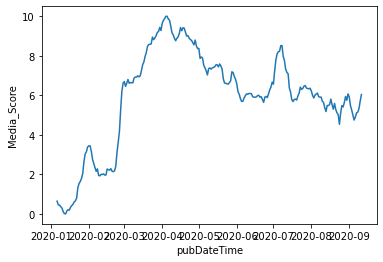

In [159]:
sns.lineplot(x=Score_DF.index, y='Media_Score', data=Score_DF)
# sns.lineplot(x='pubDateTime', y='corona_articles_number', data=Score_DF)

## Sentiment Score calculation

In [209]:
DF = pd.read_csv('/home/aneesh/data/srf_data/processed/processed_new.csv')
DF.pubDateTime = pd.to_datetime(DF.pubDateTime, utc=True)
DF = DF.drop(columns='Unnamed: 0')

/opt/miniconda3/envs/hackzh2020/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [210]:
sentiment_score = joblib.load('/home/aneesh/data/srf_data/processed/sentiments.joblib')
sentiment_score = {sent[1]:sent[0] for sent in sentiment_score}

In [211]:
DF = DF.reset_index()
DF['sentiment_score'] = DF['index'].progress_apply(lambda x: sentiment_score[x] if x in sentiment_score.keys() else 0)

In [212]:
DF = DF[DF['corona_articles'].notna()]
DF['pubDateTime']= DF.pubDateTime.dt.date

In [213]:
DF= DF[['pubDateTime','sentiment_score']].groupby(by=['pubDateTime']).mean()

In [214]:
DF = DF.rolling(7).mean().dropna()

<AxesSubplot:xlabel='pubDateTime', ylabel='sentiment_score'>

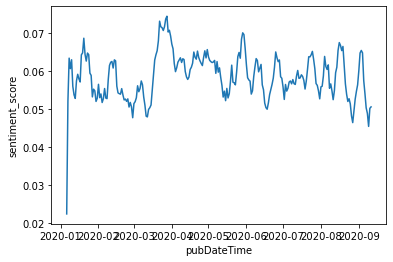

In [215]:
sns.lineplot(x = DF.index, y=DF.sentiment_score)

In [220]:
max_score = np.max(DF.sentiment_score.values)
min_score = np.min(DF.sentiment_score.values)
score_range = max_score -min_score
DF['Score'] = DF.sentiment_score.apply(lambda x : (x-min_score)*10.0/score_range)
DF = DF.drop(columns='sentiment_score')

In [226]:
DF.to_csv('/home/aneesh/data/srf_data/processed/Swiss_media_corona_sentiment_score.csv')